In [1]:
!pip install yellowbrick

In [2]:

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA

In [3]:
df= pd.read_csv("lending_club_loan_two.csv")

In [4]:
df= df.dropna()
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B,B4,Michael's Arts & Crafts,5 years,RENT,64000.0,...,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0,"514 Cynthia Park Apt. 402\r\nWest Williamside,..."
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335868 non-null  float64
 1   term                  335868 non-null  object 
 2   int_rate              335868 non-null  float64
 3   installment           335868 non-null  float64
 4   grade                 335868 non-null  object 
 5   sub_grade             335868 non-null  object 
 6   emp_title             335868 non-null  object 
 7   emp_length            335868 non-null  object 
 8   home_ownership        335868 non-null  object 
 9   annual_inc            335868 non-null  float64
 10  verification_status   335868 non-null  object 
 11  issue_d               335868 non-null  object 
 12  loan_status           335868 non-null  object 
 13  purpose               335868 non-null  object 
 14  title                 335868 non-null  object 
 15  

In [6]:
df2 = df.copy()

In [7]:
df2.drop(columns = ['emp_title','home_ownership','title','earliest_cr_line','grade', 'address','purpose'],inplace=True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B4,10+ years,117000.0,Not Verified,Jan-2015,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B5,4 years,65000.0,Not Verified,Jan-2015,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B3,< 1 year,43057.0,Source Verified,Jan-2015,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A2,6 years,54000.0,Not Verified,Nov-2014,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C5,9 years,55000.0,Verified,Apr-2013,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36 months,13.11,202.49,B4,5 years,64000.0,Not Verified,Mar-2013,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0
396025,10000.0,60 months,10.99,217.38,B4,2 years,40000.0,Source Verified,Oct-2015,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36 months,12.29,700.42,C1,5 years,110000.0,Source Verified,Feb-2015,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36 months,9.99,161.32,B1,10+ years,56500.0,Verified,Oct-2013,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0


In [8]:
df2['issue_d']= pd.DatetimeIndex(df['issue_d'])

In [9]:
df2.term.replace({' 36 months':36 , ' 60 months':60}, inplace=True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B4,10+ years,117000.0,Not Verified,2015-01-01,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B5,4 years,65000.0,Not Verified,2015-01-01,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B3,< 1 year,43057.0,Source Verified,2015-01-01,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A2,6 years,54000.0,Not Verified,2014-11-01,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C5,9 years,55000.0,Verified,2013-04-01,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,B4,5 years,64000.0,Not Verified,2013-03-01,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0
396025,10000.0,60,10.99,217.38,B4,2 years,40000.0,Source Verified,2015-10-01,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36,12.29,700.42,C1,5 years,110000.0,Source Verified,2015-02-01,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36,9.99,161.32,B1,10+ years,56500.0,Verified,2013-10-01,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0


In [10]:
df2.sub_grade.sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [11]:
df2.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [12]:
df2.verification_status.replace ({'Not Verified':-1, 'Source Verified':0, 'Verified':1},inplace= True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B4,10+ years,117000.0,-1,2015-01-01,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B5,4 years,65000.0,-1,2015-01-01,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B3,< 1 year,43057.0,0,2015-01-01,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A2,6 years,54000.0,-1,2014-11-01,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C5,9 years,55000.0,1,2013-04-01,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,B4,5 years,64000.0,-1,2013-03-01,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0
396025,10000.0,60,10.99,217.38,B4,2 years,40000.0,0,2015-10-01,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36,12.29,700.42,C1,5 years,110000.0,0,2015-02-01,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36,9.99,161.32,B1,10+ years,56500.0,1,2013-10-01,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0


In [13]:
df2.sub_grade.replace({'A1':71, 'A2':72, 'A3':73, 'A4':74, 'A5':75, 'B1':61, 'B2':62, 'B3':63, 'B4':64, 'B5':65, 'C1':51,
       'C2':52, 'C3':53, 'C4':54, 'C5':55, 'D1':41, 'D2':42, 'D3':43, 'D4':44, 'D5':45, 'E1':31, 'E2':32,
       'E3':33, 'E4':34, 'E5':35, 'F1':21, 'F2':22, 'F3':23, 'F4':24, 'F5':25, 'G1':11, 'G2':12, 'G3':13,
       'G4':14, 'G5':15}, inplace= True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,64,10+ years,117000.0,-1,2015-01-01,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,65,4 years,65000.0,-1,2015-01-01,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,63,< 1 year,43057.0,0,2015-01-01,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,72,6 years,54000.0,-1,2014-11-01,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,55,9 years,55000.0,1,2013-04-01,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,64,5 years,64000.0,-1,2013-03-01,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,w,INDIVIDUAL,0.0,0.0
396025,10000.0,60,10.99,217.38,64,2 years,40000.0,0,2015-10-01,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0
396026,21000.0,36,12.29,700.42,51,5 years,110000.0,0,2015-02-01,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0
396027,5000.0,36,9.99,161.32,61,10+ years,56500.0,1,2013-10-01,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0


In [14]:
df2.application_type.unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [15]:
df2.application_type.replace({'INDIVIDUAL':1, 'JOINT':2, 'DIRECT_PAY':3}, inplace=True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,64,10+ years,117000.0,-1,2015-01-01,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,w,1,0.0,0.0
1,8000.0,36,11.99,265.68,65,4 years,65000.0,-1,2015-01-01,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,f,1,3.0,0.0
2,15600.0,36,10.49,506.97,63,< 1 year,43057.0,0,2015-01-01,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,f,1,0.0,0.0
3,7200.0,36,6.49,220.65,72,6 years,54000.0,-1,2014-11-01,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,f,1,0.0,0.0
4,24375.0,60,17.27,609.33,55,9 years,55000.0,1,2013-04-01,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,f,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,64,5 years,64000.0,-1,2013-03-01,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,w,1,0.0,0.0
396025,10000.0,60,10.99,217.38,64,2 years,40000.0,0,2015-10-01,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,w,1,0.0,0.0
396026,21000.0,36,12.29,700.42,51,5 years,110000.0,0,2015-02-01,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,f,1,1.0,0.0
396027,5000.0,36,9.99,161.32,61,10+ years,56500.0,1,2013-10-01,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,f,1,0.0,0.0


In [16]:
df2.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [17]:
df2.emp_length.replace({'< 1 year':0,'1 year':1,'2 years':2, '3 years':3, '4 years':4, '5 years':5, '6 years':6, '7 years':7,'8 years':8, '9 years':9, '10+ years': 10}, inplace=True)


In [18]:
df2.initial_list_status.unique()

array(['w', 'f'], dtype=object)

In [19]:
df2.initial_list_status.replace({'w':0,'f':1},inplace=True)
df2

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,issue_d,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,64,10,117000.0,-1,2015-01-01,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0,1,0.0,0.0
1,8000.0,36,11.99,265.68,65,4,65000.0,-1,2015-01-01,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,1,1,3.0,0.0
2,15600.0,36,10.49,506.97,63,0,43057.0,0,2015-01-01,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,1,1,0.0,0.0
3,7200.0,36,6.49,220.65,72,6,54000.0,-1,2014-11-01,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,1,1,0.0,0.0
4,24375.0,60,17.27,609.33,55,9,55000.0,1,2013-04-01,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,36,13.11,202.49,64,5,64000.0,-1,2013-03-01,Fully Paid,10.81,7.0,0.0,11456.0,97.1,9.0,0,1,0.0,0.0
396025,10000.0,60,10.99,217.38,64,2,40000.0,0,2015-10-01,Fully Paid,15.63,6.0,0.0,1990.0,34.3,23.0,0,1,0.0,0.0
396026,21000.0,36,12.29,700.42,51,5,110000.0,0,2015-02-01,Fully Paid,21.45,6.0,0.0,43263.0,95.7,8.0,1,1,1.0,0.0
396027,5000.0,36,9.99,161.32,61,10,56500.0,1,2013-10-01,Fully Paid,17.56,15.0,0.0,32704.0,66.9,23.0,1,1,0.0,0.0


In [20]:
y= df2.loan_status == 'Charged Off'

In [21]:
df2.drop(columns = ['loan_status'],inplace=True)

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335868 entries, 0 to 396028
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             335868 non-null  float64       
 1   term                  335868 non-null  int64         
 2   int_rate              335868 non-null  float64       
 3   installment           335868 non-null  float64       
 4   sub_grade             335868 non-null  int64         
 5   emp_length            335868 non-null  int64         
 6   annual_inc            335868 non-null  float64       
 7   verification_status   335868 non-null  int64         
 8   issue_d               335868 non-null  datetime64[ns]
 9   dti                   335868 non-null  float64       
 10  open_acc              335868 non-null  float64       
 11  pub_rec               335868 non-null  float64       
 12  revol_bal             335868 non-null  float64       
 13 

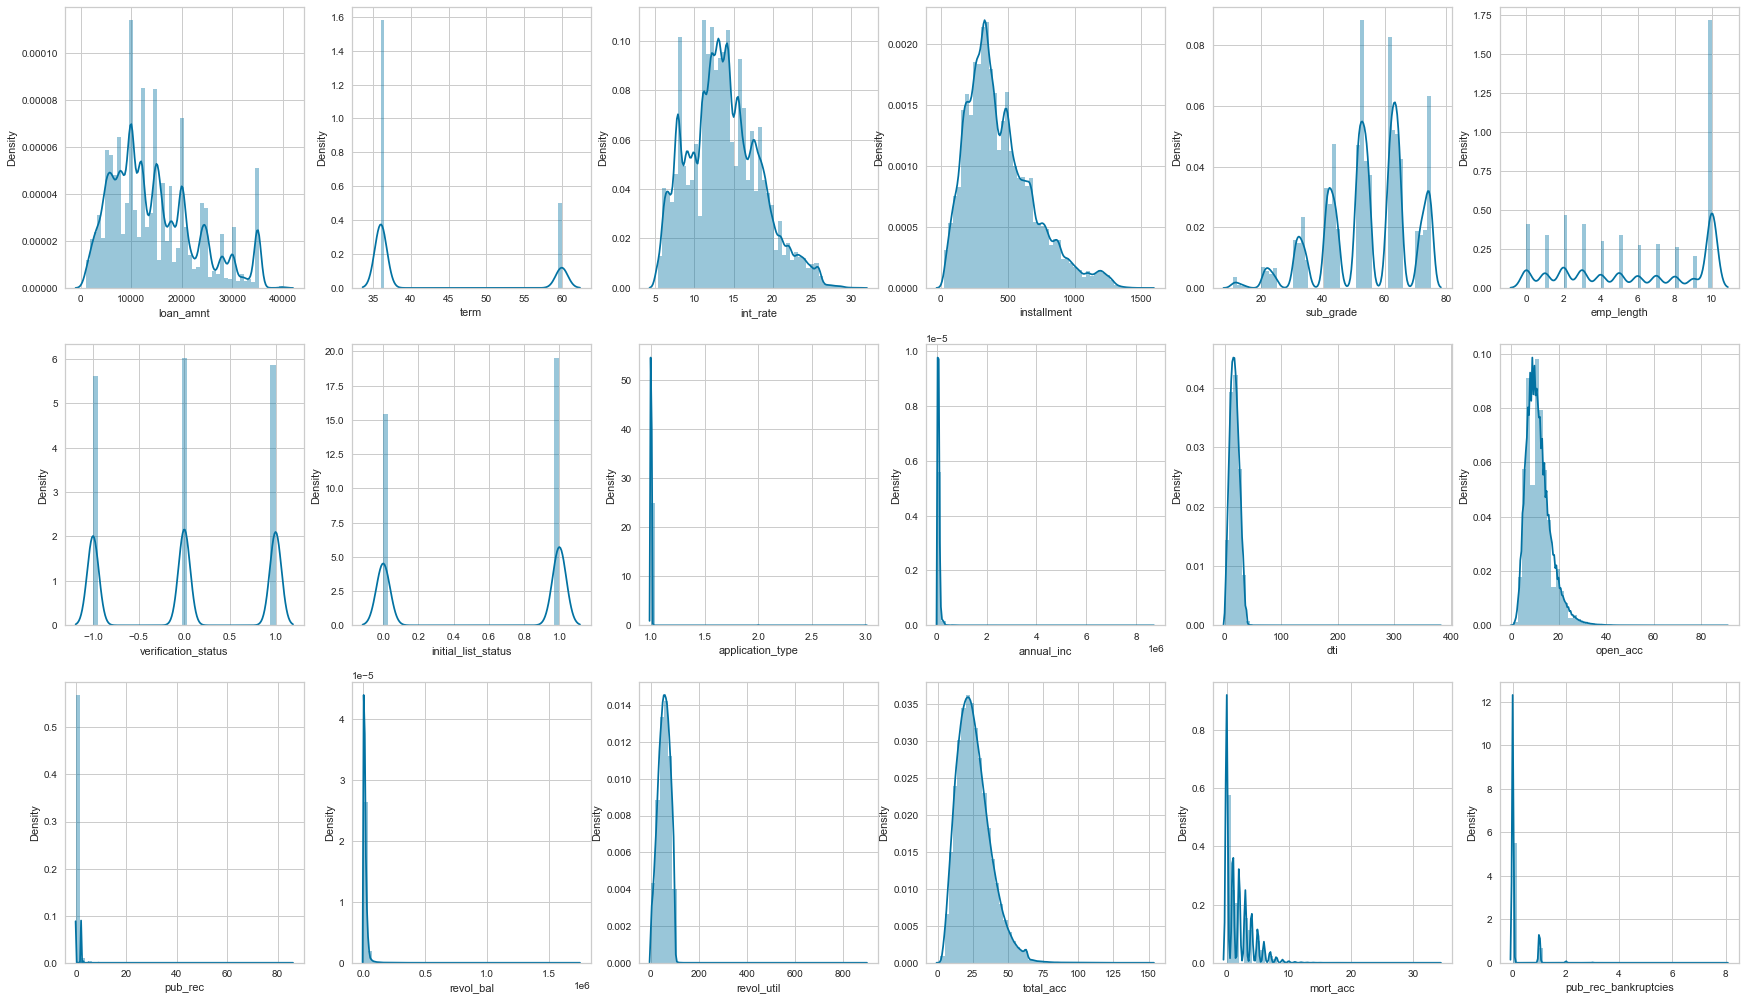

In [23]:
visualize_cols=['loan_amnt','term','int_rate','installment','sub_grade','emp_length','verification_status','initial_list_status','application_type',
                'annual_inc','dti','open_acc',
                'pub_rec','revol_bal','revol_util', 
                'total_acc','mort_acc','pub_rec_bankruptcies']
plt.figure(figsize=(30,30))

for i in range(len(visualize_cols)):
    plt.subplot(5,6,i+1)
    sns.distplot(df2[visualize_cols[i]])
plt.show()


In [24]:
X= df2
classes= ['Fully Paid', 'Charged Off']

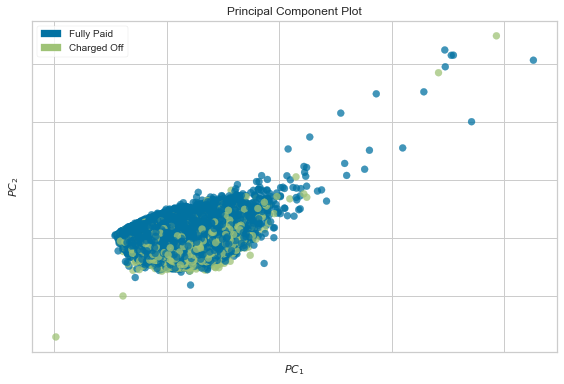

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [25]:
X[X.columns]= X[X.columns].apply(pd.to_numeric, errors='coerce')
X.dropna(axis=1, inplace=True)
visualizer= PCA(scale= True, classes= classes)
visualizer.fit_transform(X,y.values +1-1)
visualizer.show()